In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### Load metadata

In [359]:
metadata = pd.read_csv("../metadata.csv", sep=";")

### Load features and labels

In [360]:
X = pd.read_csv("../taxonomy/species_data.csv", sep=";").set_index("Sample", drop=True)
y = pd.read_csv("../labels.csv", sep=";").set_index("Sample", drop=True)

### Select only 1 of 2 datasets

In [361]:
X = X.loc[metadata[metadata["BioProject"] == "PRJNA757365"]["Run"]]
y = y.loc[metadata[metadata["BioProject"] == "PRJNA757365"]["Run"]]["Label"]

## Normalize features using min-max

In [362]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X.shape

(80, 479)

## Normalize using sparse matrix

In [363]:
from sklearn.preprocessing import StandardScaler

# Create a sparse matrix representation of the data
from scipy.sparse import csr_matrix
X_sparse = csr_matrix(X)

# Scale the data using sparse standardization
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_sparse)

# Estimate how many components use for PCA based on explained variance

## Perform PCA

In [364]:
# Perform PCA
pca = PCA()
pca.fit(X)

PCA()

## Calculate the explained variance

In [365]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

## Plot the cumulative explained variance

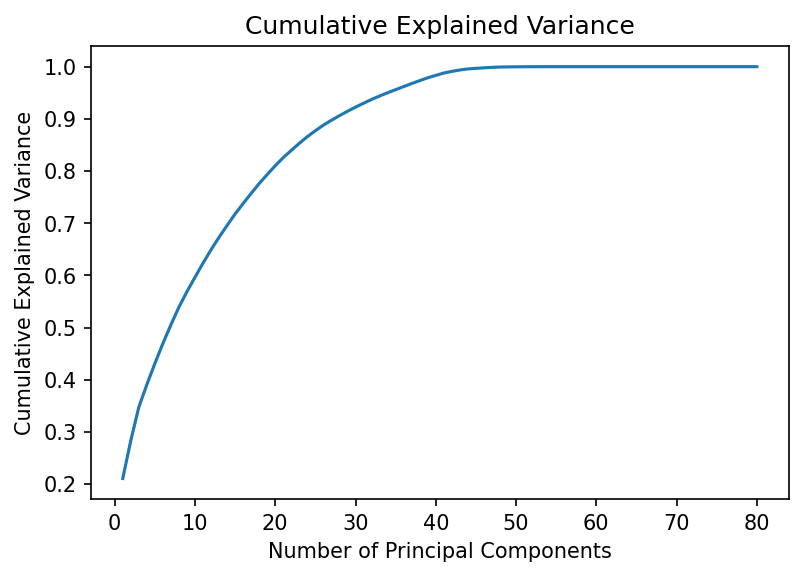

In [366]:
fig = plt.figure(dpi=150)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Run models on transformed features

## Instantiate PCA with the desired number of principal components from the previous section and split the data

In [402]:
n_components = 60
pca = PCA(n_components=n_components)

# Fit and transform data
pca.fit(X)
transformed = pca.transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.3, random_state=42)

## Logistic Regression

In [403]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4166666666666667


## SVM

In [404]:
# Fit SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3333333333333333


## Same on sparse matrix

In [393]:
X_dense = X_scaled.toarray()
n_components = 50
pca_m = PCA(n_components=n_components)

# Fit and transform data
pca_m.fit(X_dense)
transformed_m = pca_m.transform(X_dense)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_m, y, test_size=0.3, random_state=42)
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Fit SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5
Accuracy: 0.3333333333333333
